<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Statistics_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')

In [ ]:
df.head()

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010


In [ ]:
# calculate BMI
df['BMI']= df['21002-0.0'] / np.power(df['50-0.0']/100,2)

# Null hypothesis testing

Let's test if the observed differences between BMI in males and females are due to randomness.

In [ ]:
# What is the observed difference between male and female BMI?

# mean of BMI of males
np.mean(df[df['31-0.0'] == 1]['BMI']) 

27.83811796618345

In [ ]:
# mean of BMI of females
np.mean(df[df['31-0.0'] == 0]['BMI']) 

27.0914964589137

In [ ]:
observed_difference = np.mean(df[df['31-0.0'] == 1]['BMI']) - np.mean(df[df['31-0.0'] == 0]['BMI']) 

In [ ]:
observed_difference

0.7466215072697509

In [ ]:
# Test if the null hypothesis is true

#null hypothesis: BMI in males and females is identical
# random sampling of males should give us differences compared to the whole male population 
# that are as extreme or more than the differences with the female population

# the null hypothesis array will contain the difference between samples of the male population
# then we will test how many times the null array is bigger than the observed difference between males and females

null_hypothesis = np.empty(1)
df_males = df[df['31-0.0'] == 1]
# let's simulate the sampling in the same population (male)
for i in range(1000):
  males_sample = np.mean(df_males['BMI'].sample(10000))
  difference = males_sample-np.mean(df_males['BMI'])
  null_hypothesis = np.append(null_hypothesis, difference)

In [ ]:
# let's compare the sampling in males with the observed differences
np.mean(null_hypothesis >= observed_difference)

0.000999000999000999

The chances of the female and males having identical BMI distribution is 0.1%

# Significance and p-value

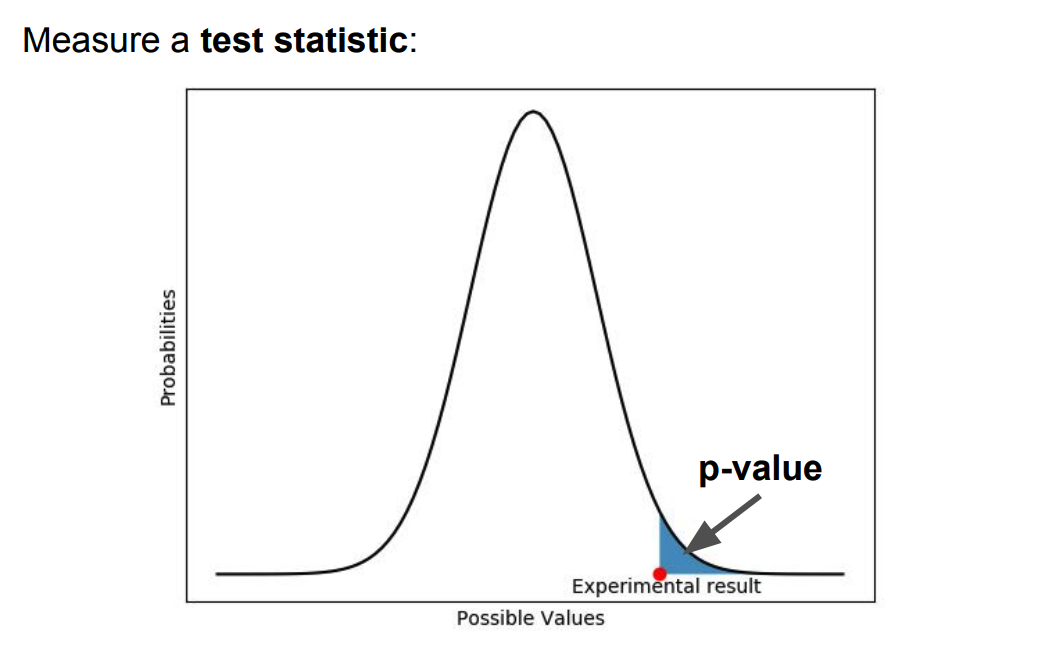

# Z-test

Z-test is a test to determine if a samples has different mean from the population. 

The $Z$ statistics is : $Z = \frac{\bar{X} - \mu }{s}$ and $s = \sigma / \sqrt(N)$



Certain conditions must hold true in the data in order to properly utilize z-tests.

1) Population mean and population standard deviation must be known.

2) Sample mean is known.

3) Assumption or test that the sample of data offers some variation and therefore would form a normal distribution by resampling - consistent with the Central Limit Theorem.

4) Sample observations were randomly drawn from a population.

5) Sample size is known and sufficiently large - often n>=30.

6) Assumption that the population from which the sample is drawn from is approximately normal.




Weaknesses of z-test:

* Need the true population mean
* Need the true population standard deviation

Usually, we only have access to the sample mean and standard deviation. In this case, a Student's t-test is appropriate.

In [ ]:
# 1) Take measurements from a large control group we'll call the population.
# Population: males. Measurement: BMI
df_males = df[df['31-0.0'] == 1]

In [ ]:
# calculate mean and std of the population from scratch
mean = 0
std = 0

for i in df_males['BMI']:
  mean = mean + i
mean = mean/len(df_males['BMI'])

for i in df_males['BMI']:
  std = std + (i - mean)**2
std = std/len(df_males['BMI'])
std = sqrt(std)

In [ ]:
# 2) Declare a null and alternative hypothesis.
# is it a right-tailed, left-tailed or two-tailed test?

# 3) Decide on an alpha level - the probability of obtaining a sample mean with treatment from the population.

# 4) Apply a treatment to a new sample group of size n and record measurements.

# 5) Take a sufficient number of samples of size n from the population values 
# and record a single statistic of each sample such as the mean or median. 
# This is called the sampling distribution.
# For example: take 1000 males taller than 180cm or shorter than 180cm as sampling distribution.

# 6) Verify data collected meets the requirements needed to run a z-test (see above).

# 7) Calculate the standard deviation of the sampling distribution - called the standard error.

# 8) Compute how many standard errors the statistic (such as the mean) of the sample group 
# with treatment is from the statistic (such as the mean) of the sampling distribution. 
# This is called the z-score.

# 9) Determine if this sample group with treatment is significantly different from the population based on the pre-decided alpha level.

In [ ]:
# let's show a sampling distribution of the population
# let's create 500 samples of 100 individuals each
import random
np.random.seed(2021)

sample_means = []
n= 100
for sample in range(0, 500):
    sample_values = random.sample(list(df_males['BMI']), n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


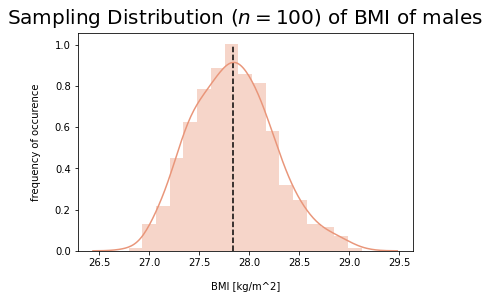

In [ ]:
sns.distplot(sample_means, color='darksalmon')
plt.title("Sampling Distribution ($n=100$) of BMI of males", y=1.015, fontsize=20)
plt.xlabel("BMI [kg/m^2]", labelpad=14)
plt.vlines(x = mean, ymin = 0, ymax=1, linestyle = '--')
plt.ylabel("frequency of occurence", labelpad=14);

In [ ]:
# two samples of the population (independent)

sample1 = random.sample(list(df[(df['50-0.0'] > 180) & (df['31-0.0'] == 1)]['BMI']), 500)
sample2 = random.sample(list(df[(df['50-0.0'] <= 180) & (df['31-0.0'] == 1)]['BMI']), 500)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


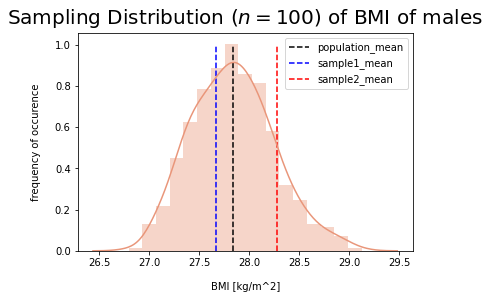

In [ ]:
# let's show the sample means in the above distribution

sns.distplot(sample_means, color='darksalmon')
plt.title("Sampling Distribution ($n=100$) of BMI of males", y=1.015, fontsize=20)
plt.xlabel("BMI [kg/m^2]", labelpad=14)
plt.vlines(x = mean, ymin = 0, ymax=1, linestyle = '--', label= 'population_mean')
plt.vlines(x = np.mean(sample1), ymin = 0, ymax=1, linestyle = '--', color = 'b', label = 'sample1_mean')
plt.vlines(x = np.mean(sample2), ymin = 0, ymax=1, linestyle = '--', color = 'r', label = 'sample2_mean')
plt.legend()
plt.ylabel("frequency of occurence", labelpad=14);

## Exercise 1

Calculate Z-score of each sample vs population

Calculate the p-value from the two Z-scores, using the distribution of probability of the normal gaussian for a critical value obtained with:

```
import scipy
scipy.stats.norm.sf(abs(zscore))
```

Careful! Is it two tailed or one tailed? How do you adjust the p-value?


Now the easy part: verify your work with statsmodel


```
from statsmodels.stats.weightstats import ztest

ztest(sample1,value = mean, alternative='two-sided')
```



In [ ]:
# calculate Z-score of each sample vs population
x1 = (np.mean(sample1) - df_males['BMI'].mean())/(np.std(sample1)/sqrt(len(sample1)))
x2 = (np.mean(sample2) - df_males['BMI'].mean())/(np.std(sample2)/sqrt(len(sample1)))

In [ ]:
# calculate the p value
import scipy
# since it is two-tailed, multiply by 2
2* scipy.stats.norm.sf(abs(x1))

0.34252942156097754

In [ ]:
# now the easy part: verify your work with statsmodel
from statsmodels.stats.weightstats import ztest

ztest(sample1,value = mean, alternative='two-sided')

In [ ]:
ztest(sample2,value = mean, alternative='two-sided')


(1.9999205983372288, 0.04550883852220246)

Interpretation?

# t-test


A t-test is used to see if two separate samples have the same mean value. However, T-Tests differ from z-tests because we use them when the mean and standard deviations of the population are not known. Situations to use a T-Test:
* Data is independent
* Approximately normally distributed data
* Similar amount of variance within the groups being compared (homogenous)

The t-statistic is a ratio between the difference between two groups and the difference within the groups.

## Exercise 2

Let's calculate a t-statistic and compute a p-value in practice for the BMI of two small samples of males and females.


Samples:


```
males = df[df['31-0.0'] == 1]['BMI'].sample(25)

females = df[df['31-0.0'] == 0]['BMI'].sample(25)

```

#### Descriptive procedure

The observed difference between samples (effect size) is a random variable, and under the null hypothesis it is zero.


```
tstat = observed difference between sample means / standard error of the difference between the means

tstat = (mean(X1) - mean(X2)) / sed

```

We need the standard error of the difference (observed effect size) among samples:

```
sed = sqrt(se1^2 + se2^2)

se = std / sqrt(n)
```



Once we obtain the tstat, obtain from the t-distribution the frequency of the obtained t-statistics, hence, the p-value

```
from scipy import stats
stats.t.sf(np.abs(tstat), n-1)*2
```
Careful! It is multiplied by two because is a two-tailed for independent samples

Lastly, validate with a pre-made function
`stats.ttest_ind(males, females)`

In [ ]:
males = df[df['31-0.0'] == 1]['BMI'].sample(25)

females = df[df['31-0.0'] == 0]['BMI'].sample(25)

diff = np.mean(males) - np.mean(females)
diff

1.6636100382582981

In [ ]:
# the variance of the difference of two random variables is the sum of its variances

se_m = np.std(males)/sqrt(len(males))
se_f = np.std(females)/sqrt(len(females))

diff_se = sqrt(np.power(se_m, 2) + np.power(se_f, 2))

In [ ]:
tstat = diff/diff_se

In [ ]:
tstat

1.598467545860517

In [ ]:
from scipy import stats
#obtain from the t-distribution the frequency of the obtained t-statistics
stats.t.sf(np.abs(tstat), n-1)*2

0.11312584117770802

In [ ]:
# validate with a pre-made function
stats.ttest_ind(males, females)

Ttest_indResult(statistic=54.88351749035269, pvalue=0.0)

# Chi-square

It is used to decide whether there is a relationship exists between two variables of a population. Useful when analyzing survey results of 2 categorical variables.
H₀: The two categorical variables have no relationship
H₁: There is a relationship between two categorical variables

The number of degrees of freedom of the χ2 independence test statistics:

d.f. = (# rows -1) *(#columns-1)

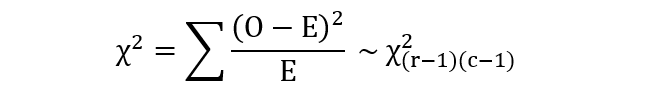

In [ ]:
# is there a difference between having diabetes in individuals taller or shorter than 180cm?


In [ ]:
conditions = [df['50-0.0']<180, df['50-0.0']>=180]
choices = ['short', 'tall']
df['height'] = np.select(conditions, choices, default= None)

In [ ]:
conditions = [df['2443-0.0']==0, df['2443-0.0']==1]
choices = ['no', 'yes']
df['diabetes'] = np.select(conditions, choices, default= None)

In [ ]:
df.dropna(subset= ['height','diabetes'], inplace =True)

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(df['height'],
                            df['diabetes'],
                           margins=True, margins_name="Total")

In [ ]:
data_crosstab

diabetes,no,yes,Total
height,,,
short,16336,929,17265
tall,2418,129,2547
Total,18754,1058,19812


## Exercise 3
Calculate the chi-square statistics according to the formula above and then retrieve the critical value from the chi-squared distribution for the probability and number of degrees of freedom.

```
degrees_freedom = (len(rows)-1)*(len(columns)-1)
stats.distributions.chi2.sf(chi_square, degrees_freedom)
```

Lastly, validate your results with the pre-made function:

```
scipy.stats.chi2_contingency(contingency_table, 1)
```




In [ ]:
# significance level
alpha = 0.05

# Calculation of Chisquare test statistics
chi_square = 0
rows = df['height'].unique()
columns = df['diabetes'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# p-value obtained from the chi-square distribution 
degrees_freedom = (len(rows)-1)*(len(columns)-1)

stats.distributions.chi2.sf(chi_square, degrees_freedom)

0.507810334214415

In [ ]:
stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab.iloc[0:2,0:2], 1)
p

0.5385233627459436

# K-S test

Does the BMI follow a normal distribution in the population?

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(df['BMI'], 'norm')

KstestResult(statistic=nan, pvalue=nan)

In [ ]:
df_clean = df.dropna(subset = ['BMI'])

In [ ]:
kstest(df_clean['BMI'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Interpretation?

In [ ]:
kstest?

In [ ]:
kstest(df_clean['BMI'], 'norm')

In [ ]:
# Is female BMI distributed in the same way as male BMI?

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(df_clean['31-0.0'] == 0, df_clean['31-0.0'] == 1)

Ks_2sampResult(statistic=0.08584360070404823, pvalue=4.5885622071368556e-64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


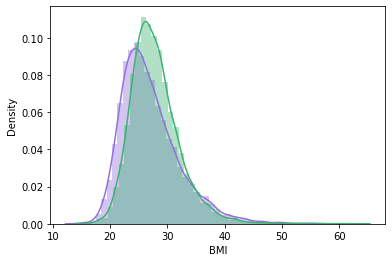

In [ ]:
sns.distplot(df_clean[df_clean['31-0.0'] == 0]['BMI'], color='mediumpurple')
sns.distplot(df_clean[df_clean['31-0.0'] == 1]['BMI'], color='mediumseagreen')
# plt.xlim(0,100)